In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") # 255
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10, batch_size=128, validation_split=0.2) # 20%만 val data로 이용함

model = get_model()
history_zeros = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 17ms/step - loss: 0.6186 - accuracy: 0.8116 - val_loss: 0.2678 - val_accuracy: 0.9151
Epoch 2/10
375/375 [==============================] - 6s 16ms/step - loss: 0.2497 - accuracy: 0.9221 - val_loss: 0.2329 - val_accuracy: 0.9277
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1613 - accuracy: 0.9503 - val_loss: 0.1964 - val_accuracy: 0.9403
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1171 - accuracy: 0.9630 - val_loss: 0.1361 - val_accuracy: 0.9597
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.1161 - val_accuracy: 0.9664
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0624 - accuracy: 0.9808 - val_loss: 0.1796 - val_accuracy: 0.9457
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.1280 - val_accuracy: 0.9642

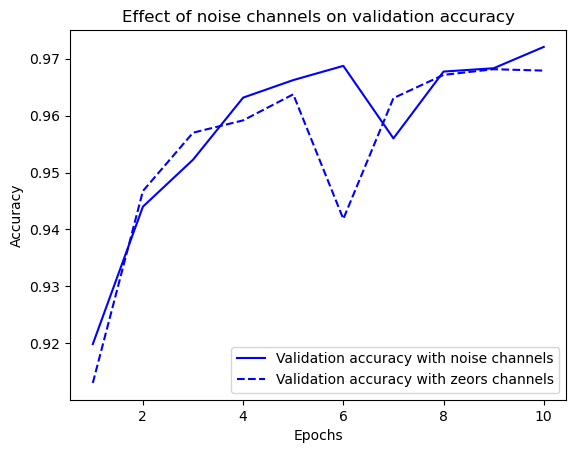

In [8]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, "b-", label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeors channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(train_images, random_train_labels,
         epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 8ms/step - loss: 2.3141 - accuracy: 0.1031 - val_loss: 2.3057 - val_accuracy: 0.1068
Epoch 2/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2993 - accuracy: 0.1184 - val_loss: 2.3069 - val_accuracy: 0.1081
Epoch 3/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2923 - accuracy: 0.1274 - val_loss: 2.3186 - val_accuracy: 0.1029
Epoch 4/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2805 - accuracy: 0.1375 - val_loss: 2.3199 - val_accuracy: 0.0972
Epoch 5/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2647 - accuracy: 0.1483 - val_loss: 2.3323 - val_accuracy: 0.1034
Epoch 6/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2455 - accuracy: 0.1644 - val_loss: 2.3459 - val_accuracy: 0.1033
Epoch 7/100
375/375 [==============================] - 3s 7ms/step - loss: 2.2229 - accuracy: 0.1794 - val_loss: 2.3645 - val_accuracy: 0.0998

Epoch 58/100
375/375 [==============================] - 3s 7ms/step - loss: 0.7696 - accuracy: 0.7502 - val_loss: 4.9186 - val_accuracy: 0.0999
Epoch 59/100
375/375 [==============================] - 3s 7ms/step - loss: 0.7515 - accuracy: 0.7559 - val_loss: 5.0045 - val_accuracy: 0.0990
Epoch 60/100
375/375 [==============================] - 3s 7ms/step - loss: 0.7366 - accuracy: 0.7606 - val_loss: 5.0502 - val_accuracy: 0.0997
Epoch 61/100
375/375 [==============================] - 3s 7ms/step - loss: 0.7224 - accuracy: 0.7660 - val_loss: 5.1352 - val_accuracy: 0.1001
Epoch 62/100
375/375 [==============================] - 3s 7ms/step - loss: 0.7074 - accuracy: 0.7705 - val_loss: 5.2078 - val_accuracy: 0.0988
Epoch 63/100
375/375 [==============================] - 3s 7ms/step - loss: 0.6938 - accuracy: 0.7754 - val_loss: 5.2578 - val_accuracy: 0.1009
Epoch 64/100
375/375 [==============================] - 3s 7ms/step - loss: 0.6777 - accuracy: 0.7822 - val_loss: 5.3401 - val_accuracy: